In [6]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Load Titanic Dataset

In [8]:
df = pd.read_csv("data.csv")  # Kaggle Titanic dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Check Missing Values

In [9]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handle Missing Values

In [13]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True, errors='ignore')


# Feature Engineering (5 Features)

In [16]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['FarePerPerson'] = df['Fare'] / df['FamilySize']
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,Title,FarePerPerson,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,Mr,3.62500,"(20, 40]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,Mrs,35.64165,"(20, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss,7.92500,"(20, 40]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,Mrs,26.55000,"(20, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Mr,8.05000,"(20, 40]"


# Statistical Summary

In [17]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,FarePerPerson
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,1.904602,0.602694,19.916375
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,1.613459,0.489615,35.841257
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,7.250000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000,8.300000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000,23.666667
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,1.000000,512.329200


In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    int64   
 2   Pclass         891 non-null    int64   
 3   Name           891 non-null    object  
 4   Sex            891 non-null    object  
 5   Age            891 non-null    float64 
 6   SibSp          891 non-null    int64   
 7   Parch          891 non-null    int64   
 8   Ticket         891 non-null    object  
 9   Fare           891 non-null    float64 
 10  Embarked       891 non-null    object  
 11  FamilySize     891 non-null    int64   
 12  IsAlone        891 non-null    int32   
 13  Title          891 non-null    object  
 14  FarePerPerson  891 non-null    float64 
 15  AgeGroup       891 non-null    category
dtypes: category(1), float64(3), int32(1), int64(6), object(5)
memory usage: 102.2+ K

# Visualizations (3–4 Plots)

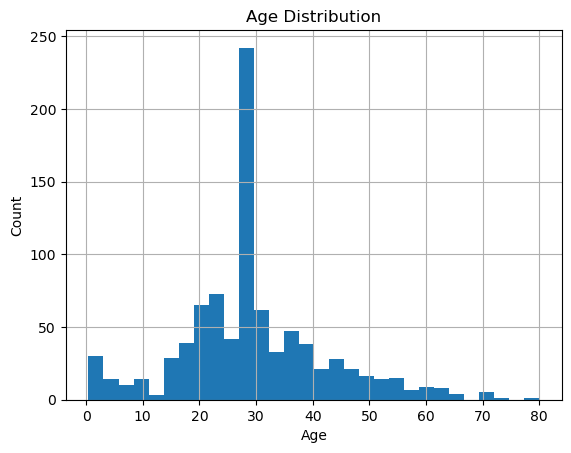

In [20]:
import matplotlib.pyplot as plt

df['Age'].hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


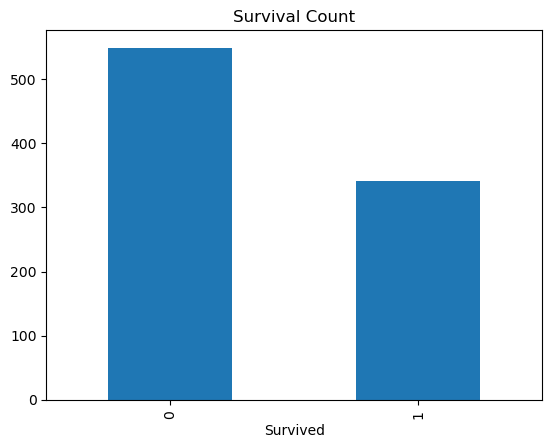

In [21]:
df['Survived'].value_counts().plot(kind='bar')
plt.title("Survival Count")
plt.show()


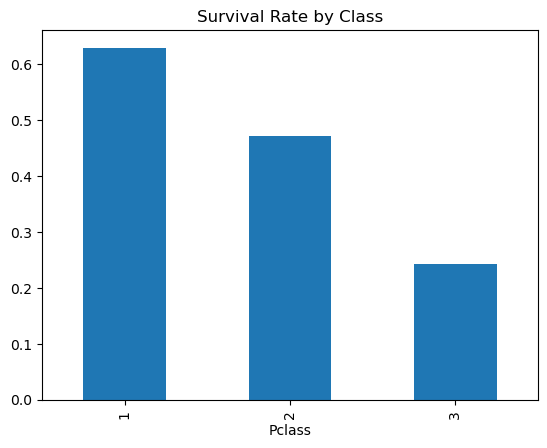

In [22]:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Class")
plt.show()


In [23]:
df.to_csv("titanic_cleaned.csv", index=False)
